# Time Complexity Check

In this notebook, we will calculate performance and estimate asymptotic time complexity
of implemented algorithms and operations of data structures.

## Table of Contents
- [Binary Max Heap](#Binary-Max-Heap)
- [Self-balancing Binary Search Tree: AVL Tree](#Self-balancing-Binary-Search-Tree:-AVL-Tree)
- [Integer Sorting Algorithm: Radix Sort](#Integer-Sotring-Algorithm:-Radix-Sort)


In [15]:
import copy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm
from heap import MaxHeap
from avl import AVL
from radix_sort import radix_sort
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["mathtext.fontset"] = "cm"
%matplotlib inline


def fit_n(x, a, b):
    return a * x + b

def fit_logn(x, a, b, c):
    return a * np.log(b * x) + c

def fit_nlogn(x, a, b, c):
    return a * x * np.log(b * x) + c

## [Binary Max Heap](https://en.wikipedia.org/wiki/Binary_heap)

### Theoretical Time Complexity
- Building a heap from array: $\mathcal{O}(n)$
- Insert: $\mathcal{O}(1)$ in average, $\mathcal{O}(\lg n)$ in the worst case
- Sort: $\mathcal{O}(n\lg n)$
- Search: $\mathcal{O}(n)$
- Find max: $\mathcal{O}(1)$
- Max heapify: $\mathcal{O}(\lg n)$

Performance of build, sort, insert (in average and in the worst case) is measured with
various input sizes and the time complexity is estimated by curve fitting the measurements.

In [2]:
N = np.logspace(1, 6, 20, dtype=int)
n_iter = 70
try:
    calc_time_heap
except NameError:
    calc_time_heap = pd.DataFrame(index=N, columns=["build", "insert_average", "insert_worst", "heap_sort"])

In [3]:
calc_time_heap_build = []
calc_time_heap_insert_average = []
calc_time_heap_insert_worst = []
calc_time_heap_sort = []

for n in tqdm(N):
    unordered_array = list(np.random.random(n))
    heap = MaxHeap(unordered_array)

    # Build max heap
    timeit = %timeit -qo -n1 -r75 MaxHeap(unordered_array)
    calc_time_heap_build.append(timeit.best)
    
    # Heap sort
    timeit = %timeit -qo -n1 -r75 heap.sort()
    calc_time_heap_sort.append(timeit.best)

    # Insert (average)
    #   Keep the heap size unchanged in insert performance calculation
    #   beacuse the heap will be updated by insert().
    timeit_results = []
    for i in range(n_iter):
        heap_copy = copy.deepcopy(heap)
        key = np.random.random()
        timeit = %timeit -qo -n1 -r1 heap_copy.insert(key)
        timeit_results.append(timeit.best)
    calc_time_heap_insert_average.append(min(timeit_results))

    # Insert (the worst case)
    timeit_results = []
    for i in range(n_iter):
        heap_copy = copy.deepcopy(heap)
        timeit = %timeit -qo -n1 -r1 heap_copy.insert(1.0)
        timeit_results.append(timeit.best)
    calc_time_heap_insert_worst.append(min(timeit_results))

calc_time_heap["build"] = calc_time_heap_build
calc_time_heap["insert_average"] = calc_time_heap_insert_average
calc_time_heap["insert_worst"] = calc_time_heap_insert_worst
calc_time_heap["heap_sort"] = calc_time_heap_sort

Text(0.5, 0.98, 'Performance of Heap Operations')

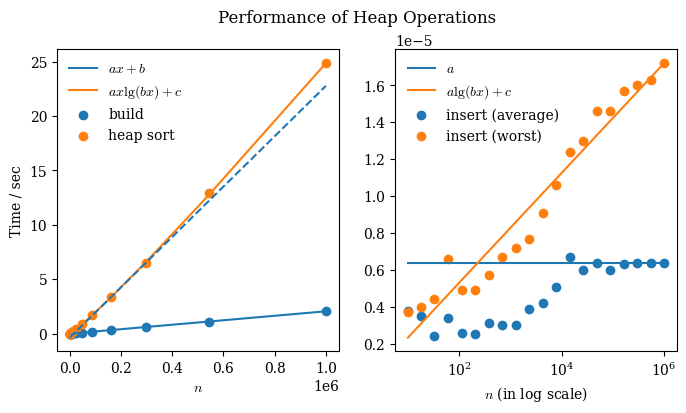

In [16]:
fig, ax = plt.subplots(1, 2, dpi=100, figsize=plt.figaspect(1/2))

ax[0].scatter(N, calc_time_heap["build"], label="build")
popt, pcov = curve_fit(fit_n, N, calc_time_heap["build"])
ax[0].plot(N, fit_n(N, *popt), label=r"$ax+b$")

ax[0].scatter(N, calc_time_heap["heap_sort"], label="heap sort")
popt, pcov = curve_fit(fit_nlogn, N, calc_time_heap["heap_sort"])
ax[0].plot(N, fit_nlogn(N, *popt), label=r"$ax\lg (bx) + c$")
popt, pcov = curve_fit(fit_n, N[-5:-2], calc_time_heap["heap_sort"].iloc[-5:-2])
ax[0].plot(N, fit_n(N, *popt), color="C0", linestyle="--")

ax[1].scatter(N, calc_time_heap["insert_average"], label="insert (average)")
ax[1].plot(N, [calc_time_heap["insert_average"].iloc[-1]] * len(N), label=r"$a$")

ax[1].scatter(N, calc_time_heap["insert_worst"], label="insert (worst)")
popt, pcov = curve_fit(fit_logn, N, calc_time_heap["insert_worst"])
ax[1].plot(N, fit_logn(N, *popt), label=r"$a\lg (bx) + c$")

ax[1].set_xscale("log")
ax[0].set_xlabel(r"$n$")
ax[1].set_xlabel(r"$n$ (in log scale)")
ax[0].set_ylabel(r"Time / sec")
ax[0].legend(frameon=False)
ax[1].legend(frameon=False)
fig.suptitle("Performance of Heap Operations")


## [Self-balancing Binary Search Tree](https://en.wikipedia.org/wiki/Self-balancing_binary_search_tree): [AVL Tree](https://en.wikipedia.org/wiki/AVL_tree)

### Theoretical Time Complexity
- Search: $\mathcal{O}(\lg n)$
- Insert: $\mathcal{O}(\lg n)$
- Delete: $\mathcal{O}(\lg n)$



In [5]:
N = np.logspace(1, 6, 20, dtype=int)
n_iter = 70
try:
    calc_time_avl
except NameError:
    calc_time_avl = pd.DataFrame(index=N, columns=["search", "insert", "delete"])

In [6]:
calc_time_avl_search = []
calc_time_avl_insert = []
calc_time_avl_delete = []

def build_key_list(n):
    while True:
        keys = np.random.random(n)
        if len(np.unique(keys)) == n:
            break
    return keys

def build_avl_with_key_list(keys):
    avl = AVL()
    for key in keys:
        avl.insert_key(key)
    return avl

for n in tqdm(N):
    keys = build_key_list(n)
    avl = build_avl_with_key_list(keys)

    # Search
    key = keys[n // 2]
    timeit = %timeit -qo -n7 -r75 avl.find_key(key)
    calc_time_avl_search.append(timeit.best)

    # Insert
    #   Keep the tree size unchanged in insert performance calculation
    #   beacuse the tree will be updated by insert().
    timeit_results = []
    for i in range(n_iter):
        avl_copy = copy.deepcopy(avl)
        while True:
            key = np.random.random()
            if key not in keys:
                break
        timeit = %timeit -qo -n1 -r1 avl_copy.insert_key(key)
        timeit_results.append(timeit.best)
    calc_time_avl_insert.append(min(timeit_results))

    # Delete
    timeit_results = []
    for i in range(n_iter):
        avl_copy = copy.deepcopy(avl)
        key = keys[np.random.randint(n)]
        timeit = %timeit -qo -n1 -r1 avl_copy.delete_key(key)
        timeit_results.append(timeit.best)
    calc_time_avl_delete.append(min(timeit_results))

calc_time_avl["search"] = calc_time_avl_search
calc_time_avl["insert"] = calc_time_avl_insert
calc_time_avl["delete"] = calc_time_avl_delete

Text(0.5, 1.0, 'Performance of AVL Tree Operations')

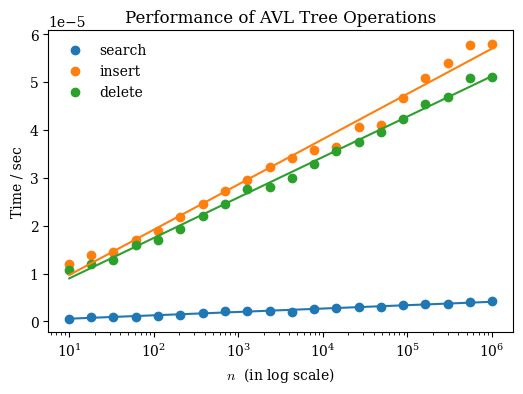

In [17]:
fig, ax = plt.subplots(dpi=100)

for column in calc_time_avl.columns:
    ax.scatter(N, calc_time_avl[column], label=column)
    popt, pcov = curve_fit(fit_logn, N, calc_time_avl[column])
    ax.plot(N, fit_logn(N, *popt))

ax.set_xscale("log")
ax.set_xlabel(r"$n$  (in log scale)")
ax.set_ylabel(r"Time / sec")
ax.legend(frameon=False)
ax.set_title("Performance of AVL Tree Operations")

## [Integer Sotring Algorithm](https://en.wikipedia.org/wiki/Integer_sorting): [Radix Sort](https://en.wikipedia.org/wiki/Radix_sort)

### Theoretical Time Complexity

Asymptotic Time complexity of radix sort is $\mathcal{O}(n\cdot d)$ where $n$ is the size
of array and $d$ is the number of digits of the maximum key.
When storing the keys in base $n$, $d = \lfloor\log_n (k)\rfloor + 1$ where $k$ is the
maximum key in array.
Therefore, time complexity will be $\mathcal{O}(n)$ for sorting $n$ positive integers
when the maximum value $k < n^{\mathcal{O}(1)}$.

While the asymptotic time complexity is smaller than that of comparison sorting algorithms
which is $\mathcal{O}(n\lg n$), radix sort is much less flexible than comparison sorting
algorithms and comparison sorting algorithms could be more faster in real world examples.

In [8]:
N = np.logspace(1, 6, 20, dtype=int)
# n_iter = 50
try:
    calc_time_sorts
except NameError:
    calc_time_sorts = pd.DataFrame(index=N)

In [9]:
calc_time_radix_sort = []
calc_time_tim_sort = []

for n in tqdm(N):
    k = 0.05 * n ** 2
    array = np.random.randint(0, k, size=n)

    # Radix sort
    timeit = %timeit -qo -n1 -r50 radix_sort(array)
    calc_time_radix_sort.append(timeit.best)

    # Timsort (Used by python's built-in sorted() function implemented in C)
    timeit = %timeit -qo -n1 -r50 sorted(array)
    calc_time_tim_sort.append(timeit.best)

calc_time_sorts["radix_sort"] = calc_time_radix_sort
calc_time_sorts["tim_sort"] = calc_time_tim_sort

Text(0.5, 1.0, 'Performance of Radix sort and Timsort')

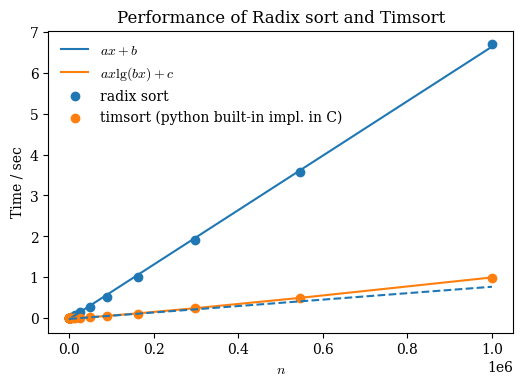

In [18]:
fig, ax = plt.subplots(dpi=100)

ax.scatter(N, calc_time_sorts["radix_sort"], label="radix sort")
popt, pcov = curve_fit(fit_n, N, calc_time_sorts["radix_sort"])
ax.plot(N, fit_n(N, *popt), label=r"$ax+b$")

ax.scatter(N, calc_time_sorts["tim_sort"], label="timsort (python built-in impl. in C)")
popt, pcov = curve_fit(fit_nlogn, N, calc_time_sorts["tim_sort"])
ax.plot(N, fit_nlogn(N, *popt), label=r"$ax\lg (bx) + c$")
popt, pcov = curve_fit(fit_n, N[-6:-3], calc_time_sorts["tim_sort"].iloc[-6:-3])
ax.plot(N, fit_n(N, *popt), color="C0", linestyle="--")

ax.set_xlabel(r"$n$")
ax.set_ylabel(r"Time / sec")
ax.legend(frameon=False)
ax.set_title("Performance of Radix sort and Timsort")